In [1]:
import pandas as pd

In [2]:
!wget -O FuelConsumption.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv

--2019-01-06 11:02:41--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.193
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: ‘FuelConsumption.csv’

FuelConsumption.csv 100%[===================>]  70.93K  26.7KB/s    in 2.7s    

2019-01-06 11:02:46 (26.7 KB/s) - ‘FuelConsumption.csv’ saved [72629/72629]



In [3]:
df = pd.read_csv('FuelConsumption.csv')

In [4]:
df.columns

Index(['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'ENGINESIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUELTYPE', 'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
       'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS'],
      dtype='object')

In [5]:
X = df[['ENGINESIZE']]

In [6]:
Y = df[['CO2EMISSIONS']]

In [7]:
from sklearn.preprocessing import PolynomialFeatures

In [8]:
poly = PolynomialFeatures(degree = 2)

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
train_x,test_x,train_y,test_y = train_test_split(X,Y,test_size = 0.2)

In [11]:
train_x_poly = poly.fit_transform(train_x)

In [12]:
train_x_poly

array([[ 1.  ,  6.4 , 40.96],
       [ 1.  ,  3.5 , 12.25],
       [ 1.  ,  3.5 , 12.25],
       ...,
       [ 1.  ,  5.3 , 28.09],
       [ 1.  ,  1.8 ,  3.24],
       [ 1.  ,  1.6 ,  2.56]])

In [13]:
from sklearn import linear_model

In [14]:
lm = linear_model.LinearRegression()

In [15]:
lm.fit(train_x_poly,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [16]:
import matplotlib.pyplot as plt

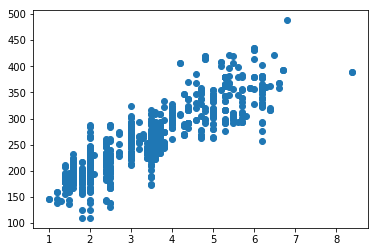

In [17]:
plt.scatter(train_x,train_y)

In [18]:
import numpy as np
x = np.arange(0,10,0.1)

In [19]:
y = lm.intercept_[0]+x*lm.coef_[0][1]+x*x*lm.coef_[0][2]

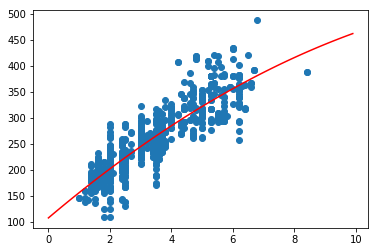

In [20]:
plt.scatter(train_x,train_y)
plt.plot(x,y,'r')

In [21]:
test_x_poly = poly.fit_transform(test_x)

In [23]:
pred = lm.predict(test_x_poly)

In [25]:
from sklearn.metrics import r2_score,mean_squared_error

In [26]:
print(r2_score(pred,test_y))

0.7392307307593562


In [27]:
print(mean_squared_error(test_y,pred))

789.9485374079024
